In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img = cv2.cvtColor( cv2.imread('../chap3/tmp.png'), cv2.COLOR_BGR2GRAY)

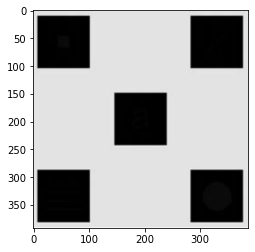

In [12]:
plt.imshow(img, cmap='gray')

In [96]:
def extract_bit_planes(img):
    filters = [0b00000001, 0b00000010, 0b00000100, 0b00001000, 0b00010000, 0b00100000, 0b01000000, 0b10000000]
    outputs = np.zeros(img.shape)
    
    planes = np.zeros((len(filters), *img.shape))
    
    f = np.vectorize(np.binary_repr)
    
    for i, filtr in enumerate(filters):
        planes[i] = f(img).astype(int) & filtr
        
    return planes
    

In [66]:
t_img = np.array([
    [0,1,8,6],
    [2,2,1,1],
    [1,15,14,12],
    [3,6,9,10],
])

In [101]:
res = extract_bit_planes(img)

IndexError: index 8 is out of bounds for axis 0 with size 8

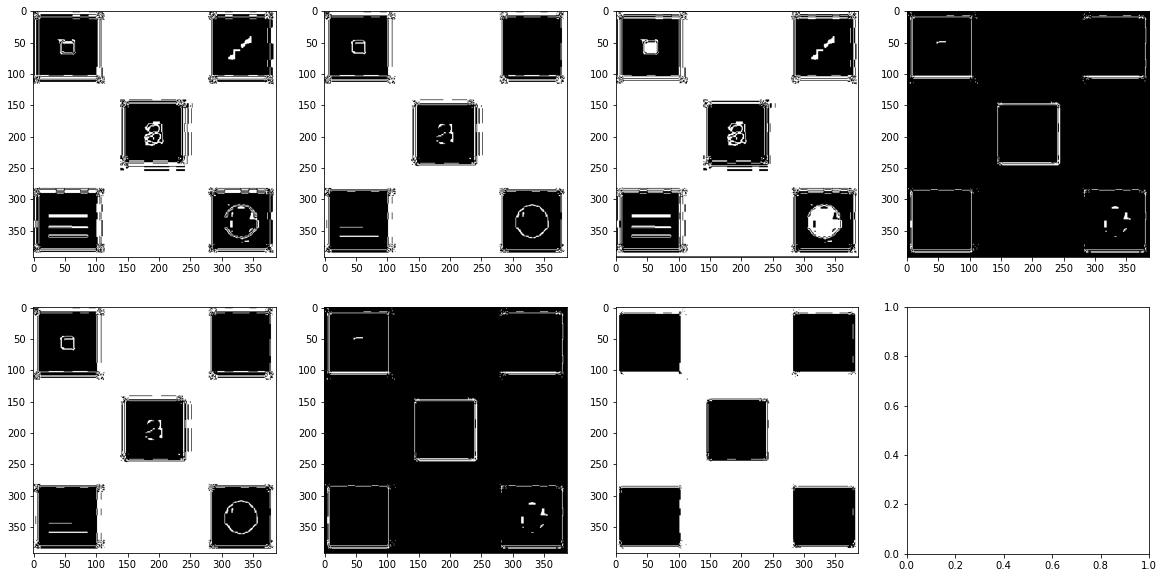

In [105]:
fig, ax = plt.subplots(2, 4, figsize=(4*5, 2*5))

plt.gray()

for i in range(8):
    row = i // 4
    col = i % 4
    
    ax[row][col].imshow(res[(row+1) * (col+1)])
    

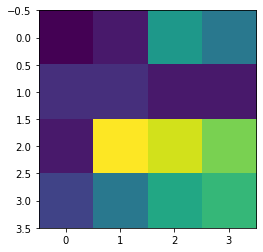

In [18]:
plt.imshow(t_img)

b'110'

In [43]:
np.binary_repr(t_img[0][3])

'110'

In [47]:
int(np.binary_repr(t_img[0][3]), 2) & 0b0100

4

In [27]:
np.vectorize(np.binary_repr)(t_img)

array([['0', '1', '1000', '110'],
       ['10', '10', '1', '1'],
       ['1', '1111', '1110', '1100'],
       ['11', '110', '1001', '1010']], dtype='<U4')

array('1111101000', dtype='<U10')